<a href="https://colab.research.google.com/github/Sajish06/task2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn plotly

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic_cleaned.csv to titanic_cleaned.csv


In [4]:
import pandas as pd
df = pd.read_csv('titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,Unknown
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,C
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,Unknown
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,C
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,Unknown


In [5]:
print(df.info())
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
 10  Deck         891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Embarked,891,3,S,646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,891,5,Mr,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
missing = df.isnull().sum()
missing[missing > 0]

,0


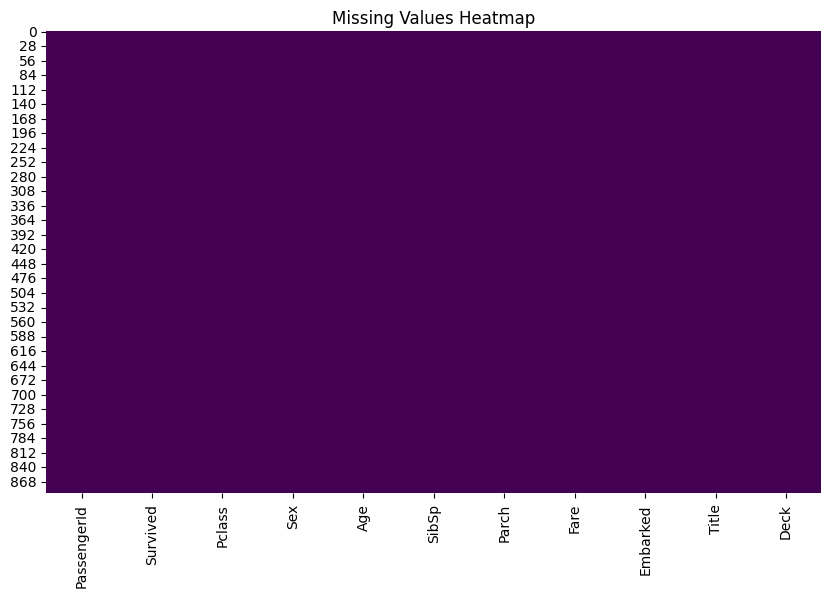

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

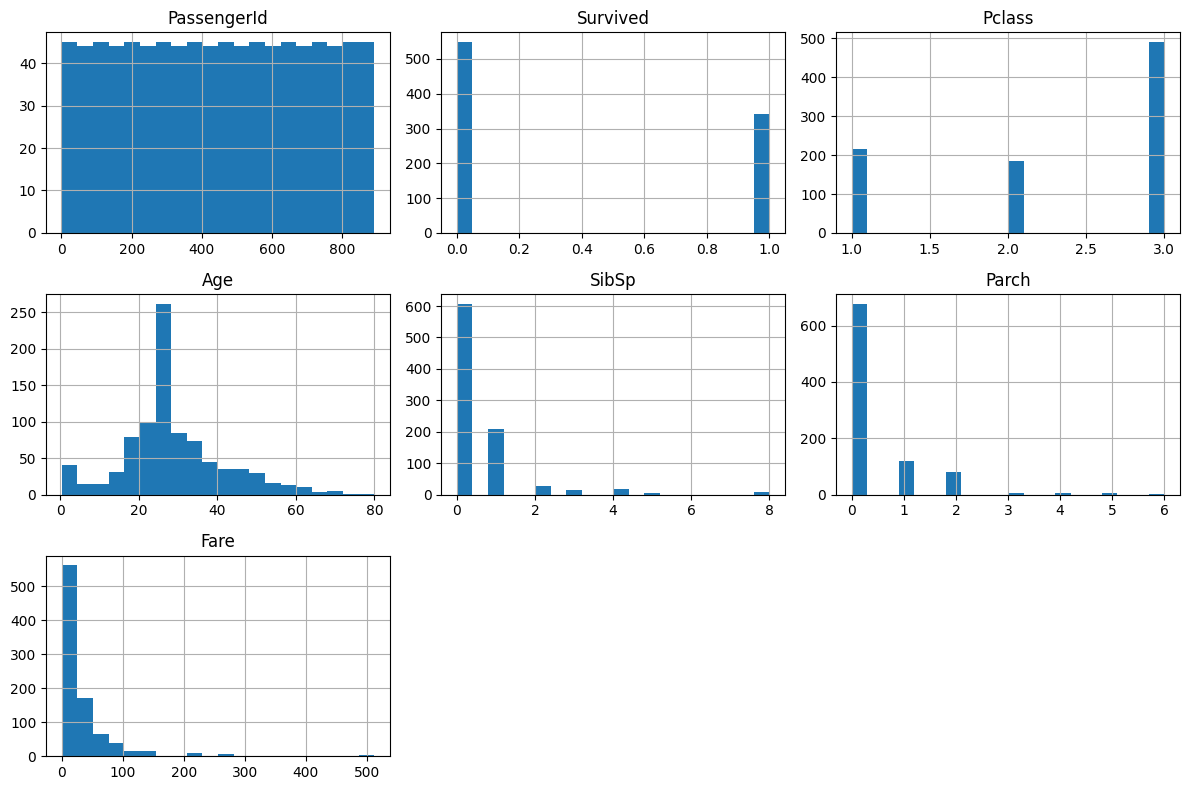

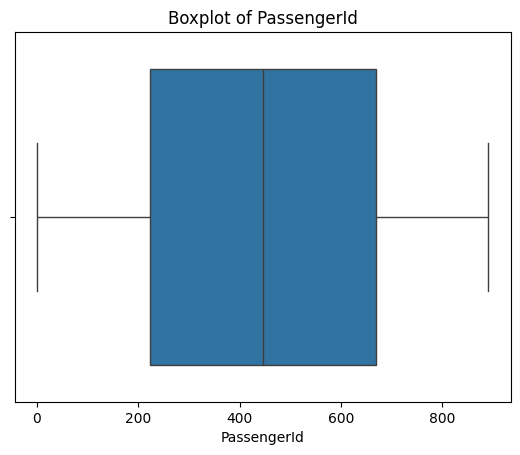

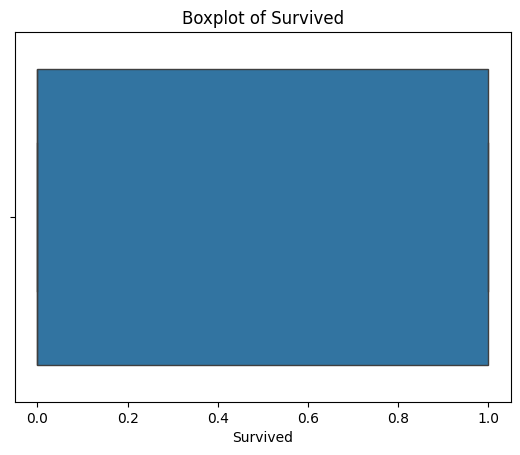

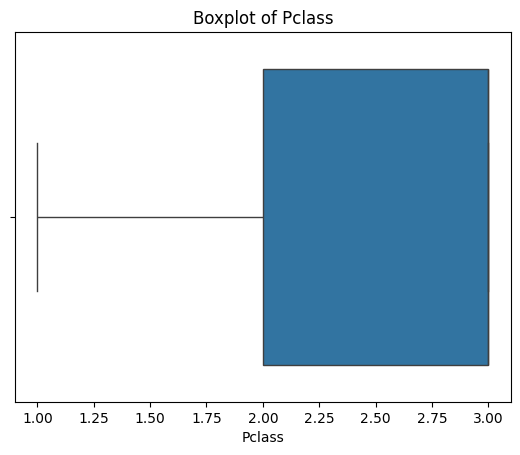

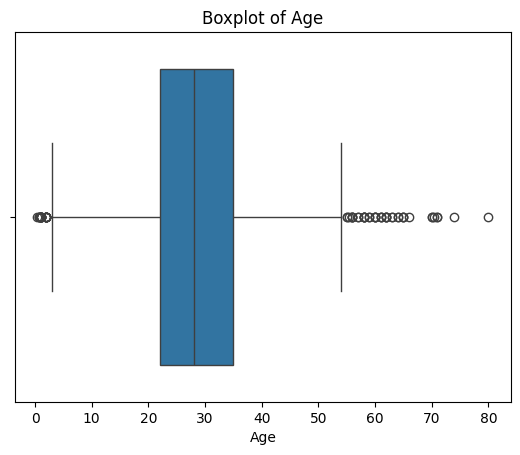

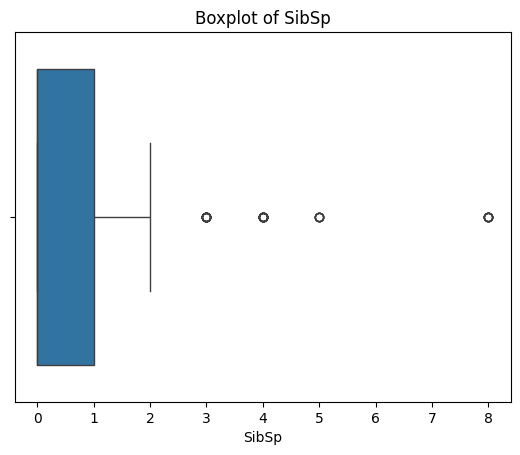

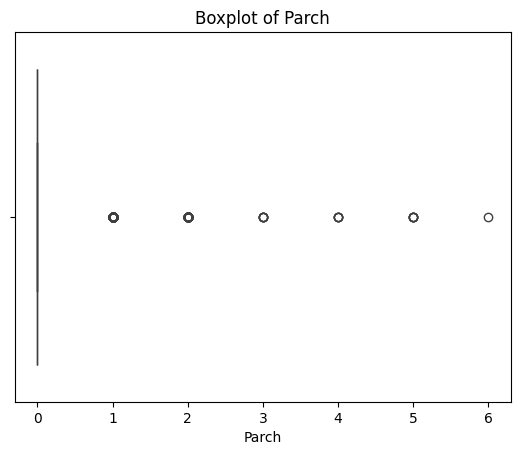

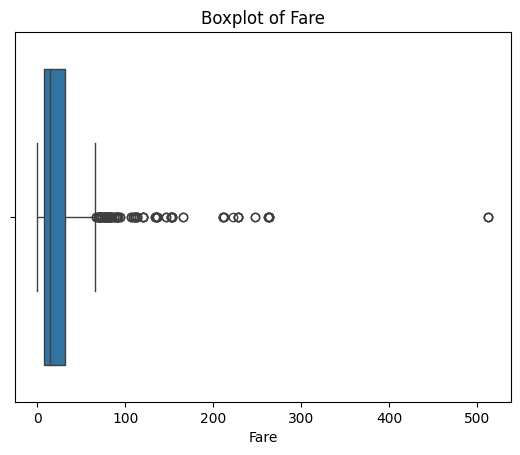

In [9]:
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns.tolist()

df[num_cols].hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

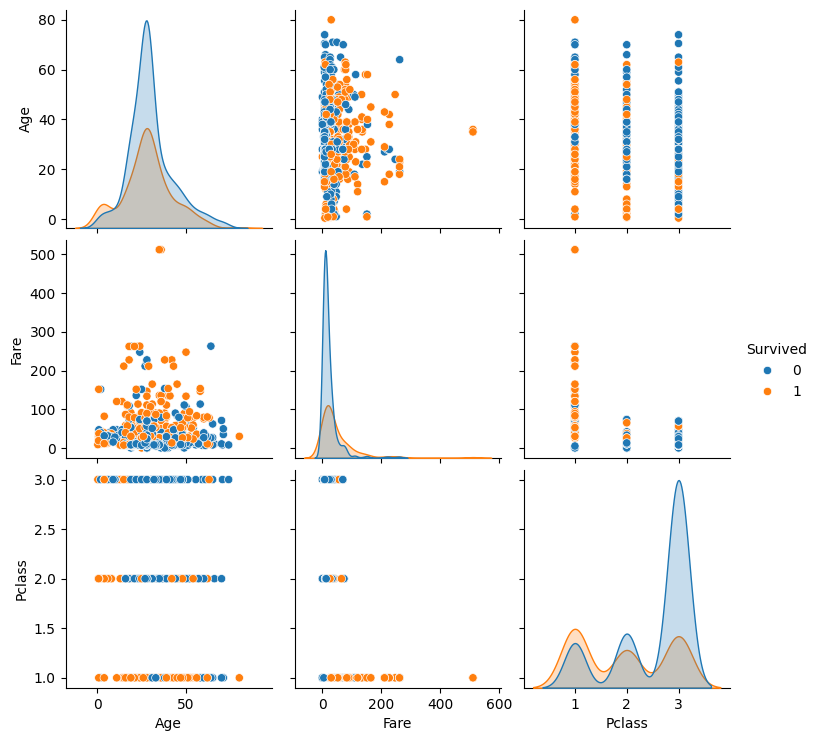

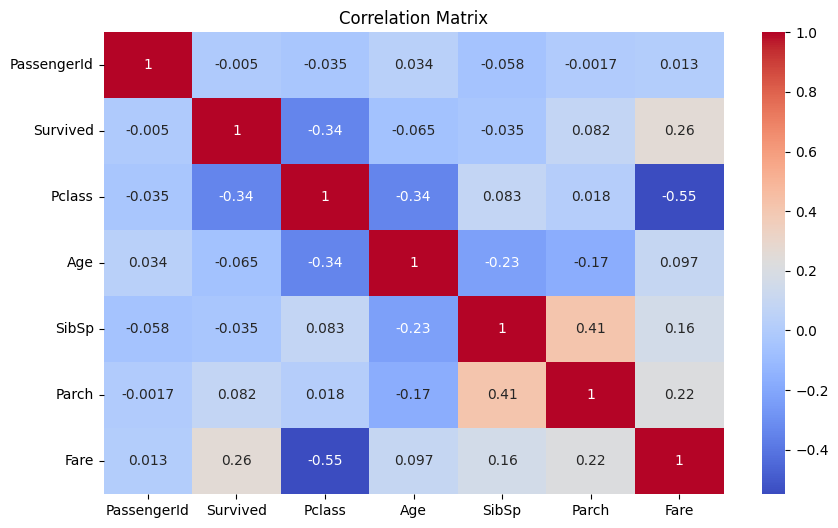

In [10]:
sns.pairplot(df[['Age','Fare','Pclass','Survived']], hue='Survived')
plt.show()

corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

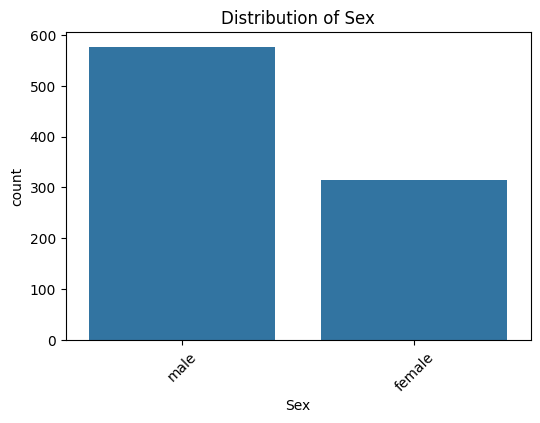

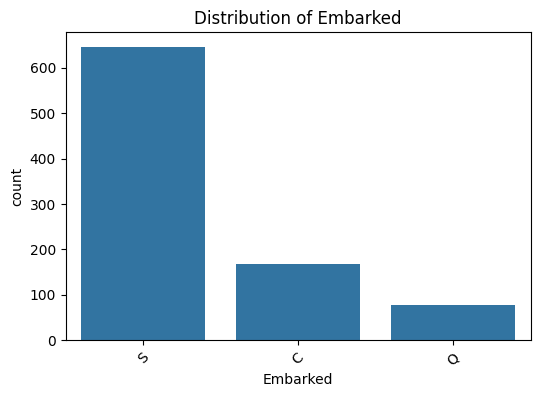

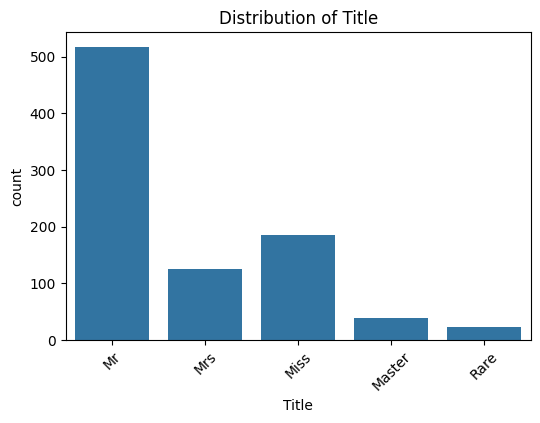

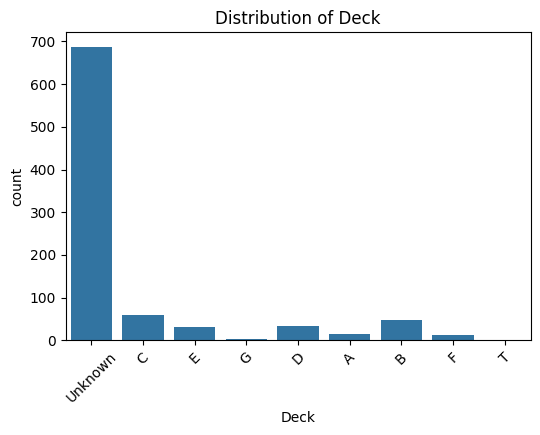

In [11]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

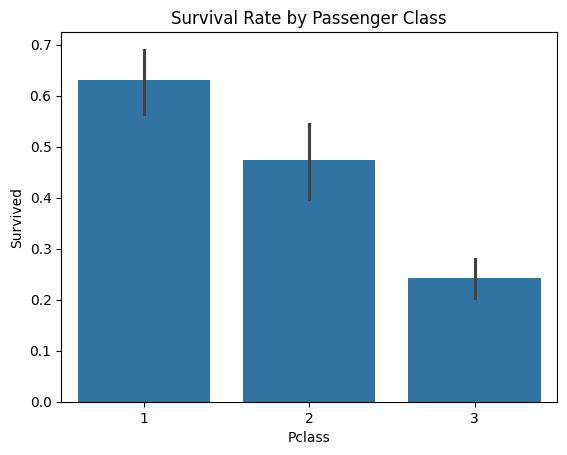

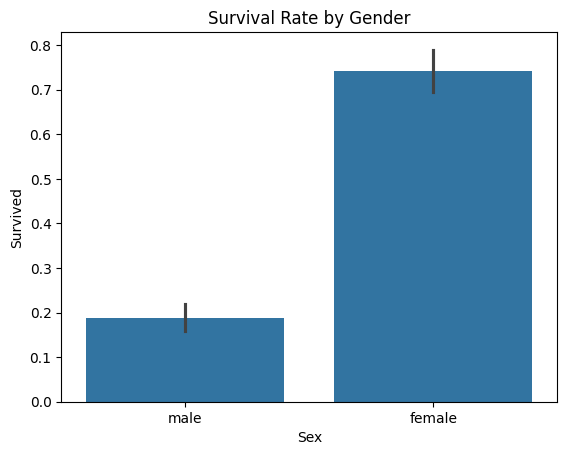

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

In [13]:
from scipy.stats import skew

for col in num_cols:
    val = skew(df[col].dropna())
    print(f"{col:10} → skewness = {val:.2f}")

PassengerId → skewness = 0.00
Survived   → skewness = 0.48
Pclass     → skewness = -0.63
Age        → skewness = 0.51
SibSp      → skewness = 3.69
Parch      → skewness = 2.74
Fare       → skewness = 4.78


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].fillna(0)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,PassengerId,3.677702
1,Survived,1.643424
2,Pclass,4.584049
3,Age,4.291997
4,SibSp,1.568121
5,Parch,1.556502
6,Fare,1.870697


In [15]:
import plotly.express as px
px.histogram(df, x='Age', color='Survived', marginal='box', nbins=30, title="Age Distribution by Survival")